# **AdvDS - Assignment 1: Binary Classification - NBA Player Prediction - Data Preparation**

Build a binary classification model that can predict if a rookie player will last at least 5 years in the NBA

**Student Name:** Nathan Fragar

**Student No. :** 93087548

**Team Name:** Group 1
* Nuwan Munasinghe
* Wenyingwuwy
* Nathan Fragar
* Sean Williams

## 1. Load and Discover Dataset

**[1.1]** TEask: Import required packages: Pandas, Numpy, joblib

In [591]:
# Task: Import the pandas, numpy and joblib package
import pandas as pd
import numpy as np
import joblib as job

**[1.2]** Task: Identify correct directory

In [592]:
! ls -l ../data/raw

total 1040
-rwxrwxrwx 1 root root  41952 Feb  8 10:25 sample_submission.csv
-rwxrwxrwx 1 root root 322813 Feb  8 10:25 test.csv
-rwxrwxrwx 1 root root 695622 Feb  8 10:25 train.csv


**[1.3]** Task: Load Test and Train Files into Pandas Data Frames

In [593]:
# File URLs
file_path_train = "../data/raw/train.csv"
file_path_test= "../data/raw/test.csv"

# Load files into df_training and df_validation data frames
df_train = pd.read_csv(file_path_train)
df_test = pd.read_csv(file_path_test)

**[1.4]** Task: Display Train and Test Data Frames

In [594]:
# Task: Display first 5 rows of df_train
df_train.head()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,10556,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,5342,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,5716,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,13790,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,5470,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1


In [595]:
# Task: Display first 5 rows of df_train
df_test.head()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,1,56,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,8194,43,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,-0.0,1.8
2,3,82,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,8196,86,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,8197,58,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9


**Observation:** Both datasets are identical with the exception the Test Dataset does not have the Target Variable. This is to be expected

**[1.5]** Task: Display Train and Test Shape

In [596]:
# Task: Display shape of df_train
df_train.shape

(8000, 21)

In [597]:
# Task: Display shape of df_test
df_test.shape

(3799, 20)

**[1.6]** Task: Display descriptive statistics for Train and Test Datasets

In [598]:
# Task: Describe df_train
df_train.describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6856.971000,62.777875,18.576663,7.267087,2.807037,6.231213,44.608900,0.264525,0.816563,19.583700,...,1.947787,71.365825,1.077838,2.168500,3.245300,1.624513,0.648688,0.245212,1.257762,0.833625
std,3977.447579,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,16.003155,...,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,4.000000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,-38.500000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,3413.750000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,8.400000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,6787.500000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,19.500000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,10299.250000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,30.600000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,13798.000000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,82.100000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


**Observations**

**Outlier - Minimum Values** - Negative for GP, 3P Made, 3PA, FTM, BLK
* GP: -8 games
* 3P Made: -1.1 
* 3PA: -3.1
* FTM: 
* BLK: -17.9

**Outlier - Maximum Values**
* MIN - A max value of 73.8 minutes played per game appears high, particularly with 75% at 23.5 - may have some outlier records
* a NBA Game has 48 minutes per game


In [599]:
# Task: Describe df_train
df_test.describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
count,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000
mean,7010.614109,62.853909,18.650224,7.328034,2.835404,6.302580,44.599079,0.255962,0.796920,19.234746,1.399842,1.953567,71.612924,1.096025,2.179495,3.275783,1.636483,0.653593,0.257726,1.257910
std,3954.173641,17.151740,8.727259,4.294724,1.688427,3.579221,6.040168,0.380987,1.052862,15.968989,0.926140,1.250376,10.457336,0.785678,1.371935,2.070646,1.335496,0.410573,0.639660,0.712449
min,1.000000,6.000000,3.700000,0.700000,0.300000,0.800000,25.100000,-1.000000,-2.700000,-38.000000,0.000000,0.000000,23.700000,0.000000,0.200000,0.300000,0.000000,0.000000,-7.100000,0.100000
25%,3644.000000,51.000000,12.200000,4.200000,1.600000,3.700000,40.500000,0.000000,0.100000,8.500000,0.700000,1.000000,65.000000,0.500000,1.200000,1.800000,0.600000,0.400000,0.100000,0.700000
50%,7062.000000,63.000000,17.000000,6.400000,2.500000,5.500000,44.600000,0.300000,0.800000,19.400000,1.200000,1.700000,71.500000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000
75%,10402.500000,74.000000,23.300000,9.400000,3.700000,8.100000,48.500000,0.500000,1.500000,30.250000,1.900000,2.600000,78.000000,1.500000,2.900000,4.300000,2.300000,0.900000,0.400000,1.600000
max,13792.000000,126.000000,68.000000,33.000000,13.400000,26.200000,74.600000,1.600000,4.300000,73.800000,7.800000,9.800000,127.100000,6.900000,12.000000,18.500000,9.000000,2.700000,14.800000,5.200000


**Obervations**
* No Negative minimums
* Outlier Maximum Values - MIN - a max value of 68 mins per game appears high
* Mean and Standard Deviation between train and test appear to be reasonably well aligned


**[1.7]** Task: Identify Missing Values

In [600]:
# Task: Display Summary (Info)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           8000 non-null   int64  
 1   GP           8000 non-null   int64  
 2   MIN          8000 non-null   float64
 3   PTS          8000 non-null   float64
 4   FGM          8000 non-null   float64
 5   FGA          8000 non-null   float64
 6   FG%          8000 non-null   float64
 7   3P Made      8000 non-null   float64
 8   3PA          8000 non-null   float64
 9   3P%          8000 non-null   float64
 10  FTM          8000 non-null   float64
 11  FTA          8000 non-null   float64
 12  FT%          8000 non-null   float64
 13  OREB         8000 non-null   float64
 14  DREB         8000 non-null   float64
 15  REB          8000 non-null   float64
 16  AST          8000 non-null   float64
 17  STL          8000 non-null   float64
 18  BLK          8000 non-null   float64
 19  TOV   

**Oberservation** 
There are no missing values in this dataset

**[1.8]** Task: Investigate Column Details - Find Min Values for each columns

In [601]:
df_train.min()

Id              4.0
GP             -8.0
MIN             2.9
PTS             0.8
FGM             0.3
FGA             0.8
FG%            21.3
3P Made        -1.1
3PA            -3.1
3P%           -38.5
FTM             0.0
FTA             0.0
FT%           -13.3
OREB            0.0
DREB            0.2
REB             0.3
AST             0.0
STL             0.0
BLK           -17.9
TOV             0.1
TARGET_5Yrs     0.0
dtype: float64

**[1.8.1]** Task: Find Rows where GP (Games Played) is negative

In [602]:
df_train_mask_GP = df_train['GP'] < 0
df_train_GP_less_zero = df_train[df_train_mask_GP]
print(df_train_GP_less_zero)

        Id  GP  MIN  PTS  FGM  FGA   FG%  3P Made  3PA   3P%  ...  FTA   FT%  \
5323  1756  -8  5.8  1.5  0.6  1.9  33.6      0.0  0.2  13.9  ...  0.2  63.6   
7400  7478  -3  6.1  2.1  0.8  1.9  39.1     -0.2 -0.5  19.2  ...  0.9  70.2   

      OREB  DREB  REB  AST  STL  BLK  TOV  TARGET_5Yrs  
5323   0.0   0.5  0.6  0.2  0.1 -0.5  0.3            0  
7400   0.6   0.4  0.8  0.1  0.3  0.1  0.4            1  

[2 rows x 21 columns]


**[1.8.2]** Task: Find Rows where 3P Made (3 Points Made) is negative

In [603]:
# Identify how many rows are positive, negative and zero
#df_train_mask_3PMade = df_train['3P Made'] > 0
#df_train_mask_3PMade = df_train['3P Made'] == 0
df_train_mask_3PMade = df_train['3P Made'] < 0
df_train_3PMade_less_zero = df_train[df_train_mask_3PMade]
print(df_train_3PMade_less_zero[['Id','GP','MIN','3P Made','3PA','3P%']])

         Id  GP   MIN  3P Made  3PA   3P%
1      5342  75  21.8     -0.3 -1.0  34.9
5      1961  88  20.0     -0.2 -0.5   6.9
12    13144  41   9.8     -0.4 -0.6  -4.7
18     3062  83   8.5     -0.3 -1.0   5.6
19      829  64  10.4     -0.1 -0.2  -6.1
...     ...  ..   ...      ...  ...   ...
7990  13494  63  10.6     -0.3 -0.8 -12.3
7991   7895  60  18.3     -0.2 -0.5  -6.4
7992   5632  45   7.1     -0.2 -0.4  23.6
7995   2996  32   9.2     -0.1 -0.2  23.1
7998   1292  39   7.7     -0.3 -0.5  13.3

[1629 rows x 6 columns]


**Observed Statistics - Negative Values for 3P Made**
* Negative - 1629 (20.4%)
* Zero - 673 (8.4%)
* Positive - 5698 (71.2%)


**[1.8.3]** Task: Find Rows where 3PA (3 Points Attempted) is negative

In [604]:
# Identify how many rows are positive, negative and zero
#df_train_mask_3PMade = df_train['3PA'] > 0
#df_train_mask_3PMade = df_train['3PA'] == 0
df_train_mask_3PMade = (df_train['3PA'] > 0)
df_train_3PMade_less_zero = df_train[df_train_mask_3PMade]
print(df_train_3PMade_less_zero[['Id','GP','MIN','3P Made','3PA','3P%']])

         Id  GP   MIN  3P Made  3PA   3P%
0     10556  80  24.3      0.1  0.3  22.6
2      5716  85  19.1      0.4  1.2  34.3
3     13790  63  19.1      0.3  0.8  23.7
4      5470  63  17.8      0.5  1.4  13.7
7     11722  57  17.6      0.9  2.8  33.2
...     ...  ..   ...      ...  ...   ...
7993   1413  27  11.4      0.7  2.1  19.3
7994   5460  65  22.2      0.5  1.5  36.6
7996  11679  54   6.0      0.1  0.1   3.1
7997   5537  85  28.2      0.2  0.6  23.6
7999   2900  49  19.2      0.7  2.4  41.3

[6122 rows x 6 columns]


**Observated Statistics**
* Negative - 1658 (20.7%)
* Zero - 220 (2.8%)
* Positive - 6342  (76.5%)

**Observation:** The 3 point statistics do not look reliable.

**Proposal:** Remove 3 point statistics from initial analysis

**Notes**
The following columns do not appear to have reliable information, they do not fit the profile of the statistic
* 3P Made - Negative Numbers should not be possible
* 3PA - Points Attempted should always be the same or greater than Points Made
* 3P% - Calculation of % should be (Points Made / Points Attempted) within a certain tolerance of error (due to rounding)
* FTM - Negative Numbers should not be possible
* FTA - Points Attempted should always be the same or greater than Points Made
* FT% 
* BLK  - Negative Numbers should not be possible


**[1.9]** Task: Check for duplicates

In [605]:
# Identify Rows that are Duplicated
dup = df_train.duplicated()
df_train[dup]

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs


In [606]:
# Identify Rows that are Duplicated
dup = df_test.duplicated()
df_test[dup]

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV


## 2. Feature Engineering

No creation of new features at this time.

**[2.1]** Create copy of Training and Test Datasets


In [607]:
# Create copy of df_train and df_test
df_train_cleaned = df_train
df_test_cleaned = df_test

**[2.2]** Task:Create Training and Test Datasets

Drop Columns: 3P Made,3PA ,3P%, FTM,FTA,FT%, ,BLK

In [608]:
# Drop Columns for Train and Test Datasets
df_train_cleaned = df_train_cleaned.drop(['3P Made','3PA','3P%','FTM','FTA','FT%','BLK'],axis=1)
df_test_cleaned = df_test_cleaned.drop(['3P Made','3PA','3P%','FTM','FTA','FT%','BLK'],axis=1)

Task: Display df_train_cleaned Information

In [609]:
# Display df_train_cleaned information
df_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           8000 non-null   int64  
 1   GP           8000 non-null   int64  
 2   MIN          8000 non-null   float64
 3   PTS          8000 non-null   float64
 4   FGM          8000 non-null   float64
 5   FGA          8000 non-null   float64
 6   FG%          8000 non-null   float64
 7   OREB         8000 non-null   float64
 8   DREB         8000 non-null   float64
 9   REB          8000 non-null   float64
 10  AST          8000 non-null   float64
 11  STL          8000 non-null   float64
 12  TOV          8000 non-null   float64
 13  TARGET_5Yrs  8000 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 875.1 KB


In [610]:
df_test_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      3799 non-null   int64  
 1   GP      3799 non-null   int64  
 2   MIN     3799 non-null   float64
 3   PTS     3799 non-null   float64
 4   FGM     3799 non-null   float64
 5   FGA     3799 non-null   float64
 6   FG%     3799 non-null   float64
 7   OREB    3799 non-null   float64
 8   DREB    3799 non-null   float64
 9   REB     3799 non-null   float64
 10  AST     3799 non-null   float64
 11  STL     3799 non-null   float64
 12  TOV     3799 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 386.0 KB


**[2.3]** Task: Import and Normalise all statistic columns

In [611]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Instantiate Scaler
scaler = MinMaxScaler()

In [612]:
# Create df_train_cleaned_scaled_cols with columns to be scaled 
df_train_cleaned_scaled_cols = df_train_cleaned[['GP','MIN','PTS','FGM','FGA','FG%','OREB','DREB','REB','AST','STL','TOV']]
df_test_cleaned_scaled_cols = df_test_cleaned[['GP','MIN','PTS','FGM','FGA','FG%','OREB','DREB','REB','AST','STL','TOV']]
df_train_cleaned_scaled_cols.head()

,GP,MIN,PTS,FGM,FGA,FG%,OREB,DREB,REB,AST,STL,TOV
0,80,24.3,7.8,3.0,6.4,45.7,2.2,2.0,3.8,3.2,1.1,1.6
1,75,21.8,10.5,4.2,7.9,55.1,3.6,3.7,6.6,0.7,0.5,1.4
2,85,19.1,4.5,1.9,4.5,42.8,0.6,1.8,2.4,0.8,0.4,0.6
3,63,19.1,8.2,3.5,6.7,52.5,0.8,2.0,3.0,1.8,0.4,1.9
4,63,17.8,3.7,1.7,3.4,50.8,2.4,2.7,4.9,0.4,0.4,0.7


In [613]:
# Scale Columns
df_train_cleaned_scaled = scaler.fit_transform(df_train_cleaned_scaled_cols)
df_test_cleaned_scaled = scaler.fit_transform(df_test_cleaned_scaled_cols)

In [614]:
# Convert numpy arrany df_train_cleaned_scaled values back to df_train_cleaned_scaled data frame 
df_train_cleaned_scaled = pd.DataFrame(np.squeeze(df_train_cleaned_scaled), columns=df_train_cleaned_scaled_cols.columns) 
df_test_cleaned_scaled = pd.DataFrame(np.squeeze(df_test_cleaned_scaled), columns=df_test_cleaned_scaled_cols.columns) 

In [615]:
df_train_cleaned_scaled.describe()

,GP,MIN,PTS,FGM,FGA,FG%,OREB,DREB,REB,AST,STL,TOV
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,0.540289,0.221109,0.193625,0.195862,0.193282,0.507819,0.195970,0.182269,0.188801,0.126915,0.180191,0.222647
std,0.130678,0.126026,0.129303,0.132295,0.127564,0.134106,0.142849,0.128910,0.133664,0.105936,0.113229,0.139090
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.450382,0.128350,0.098802,0.101562,0.099644,0.416122,0.090909,0.083333,0.089744,0.054688,0.083333,0.115385
50%,0.541985,0.196051,0.164671,0.164062,0.163701,0.503268,0.163636,0.157407,0.160256,0.101562,0.166667,0.192308
75%,0.625954,0.290550,0.260479,0.265625,0.259786,0.596950,0.272727,0.250000,0.256410,0.171875,0.250000,0.288462
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [616]:
df_train_cleaned.describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,OREB,DREB,REB,AST,STL,TOV,TARGET_5Yrs
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6856.971000,62.777875,18.576663,7.267087,2.807037,6.231213,44.608900,1.077838,2.168500,3.245300,1.624513,0.648688,1.257762,0.833625
std,3977.447579,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.785670,1.392224,2.085154,1.355986,0.407626,0.723270,0.372440
min,4.000000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,0.000000,0.200000,0.300000,0.000000,0.000000,0.100000,0.000000
25%,3413.750000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.500000,1.100000,1.700000,0.700000,0.300000,0.700000,1.000000
50%,6787.500000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.900000,1.900000,2.800000,1.300000,0.600000,1.100000,1.000000
75%,10299.250000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,1.500000,2.900000,4.300000,2.200000,0.900000,1.600000,1.000000
max,13798.000000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,5.500000,11.000000,15.900000,12.800000,3.600000,5.300000,1.000000


In [617]:
df_train_cleaned = df_train_cleaned.drop(['GP','MIN','PTS','FGM','FGA','FG%','OREB','DREB','REB','AST','STL','TOV'],axis=1)
df_test_cleaned = df_test_cleaned.drop(['GP','MIN','PTS','FGM','FGA','FG%','OREB','DREB','REB','AST','STL','TOV'],axis=1)

In [618]:
df_train_cleaned = pd.concat([df_train_cleaned, df_train_cleaned_scaled], axis=1)
df_test_cleaned = pd.concat([df_test_cleaned, df_test_cleaned_scaled], axis=1)

In [619]:
df_train_cleaned.head(10)

,Id,TARGET_5Yrs,GP,MIN,PTS,FGM,FGA,FG%,OREB,DREB,REB,AST,STL,TOV
0,10556,1,0.671756,0.301834,0.209581,0.210938,0.199288,0.531590,0.400000,0.166667,0.224359,0.250000,0.305556,0.288462
1,5342,1,0.633588,0.266573,0.290419,0.304688,0.252669,0.736383,0.654545,0.324074,0.403846,0.054688,0.138889,0.250000
2,5716,1,0.709924,0.228491,0.110778,0.125000,0.131673,0.468410,0.109091,0.148148,0.134615,0.062500,0.111111,0.096154
3,13790,1,0.541985,0.228491,0.221557,0.250000,0.209964,0.679739,0.145455,0.166667,0.173077,0.140625,0.111111,0.346154
4,5470,1,0.541985,0.210155,0.086826,0.109375,0.092527,0.642702,0.436364,0.231481,0.294872,0.031250,0.111111,0.115385
5,1961,1,0.732824,0.241185,0.239521,0.265625,0.281139,0.485839,0.327273,0.250000,0.282051,0.140625,0.111111,0.192308
6,2677,1,0.595420,0.249647,0.185629,0.226562,0.163701,0.819172,0.527273,0.407407,0.467949,0.046875,0.111111,0.211538
7,11722,1,0.496183,0.207334,0.137725,0.109375,0.138790,0.346405,0.145455,0.138889,0.147436,0.031250,0.166667,0.038462
8,6148,1,0.412214,0.332863,0.254491,0.218750,0.227758,0.494553,0.236364,0.240741,0.243590,0.140625,0.194444,0.307692
9,3040,1,0.549618,0.430183,0.482036,0.476562,0.373665,0.821351,0.618182,0.722222,0.743590,0.062500,0.111111,0.442308


In [620]:
df_test_cleaned.head(10)

,Id,GP,MIN,PTS,FGM,FGA,FG%,OREB,DREB,REB,AST,STL,TOV
0,1,0.416667,0.083981,0.102167,0.099237,0.114173,0.375758,0.173913,0.050847,0.076923,0.044444,0.074074,0.137255
1,8194,0.308333,0.242613,0.291022,0.259542,0.287402,0.422222,0.072464,0.059322,0.065934,0.388889,0.222222,0.333333
2,3,0.633333,0.469673,0.328173,0.351145,0.385827,0.414141,0.188406,0.262712,0.230769,0.277778,0.481481,0.372549
3,8196,0.666667,0.637636,0.560372,0.496183,0.594488,0.359596,0.217391,0.254237,0.258242,0.455556,0.333333,0.686275
4,8197,0.433333,0.133748,0.123839,0.099237,0.125984,0.301010,0.028986,0.033898,0.032967,0.166667,0.185185,0.156863
5,6,0.441667,0.192846,0.198142,0.190840,0.145669,0.745455,0.260870,0.203390,0.236264,0.066667,0.222222,0.156863
6,8198,0.325000,0.071540,0.077399,0.083969,0.078740,0.430303,0.072464,0.025424,0.049451,0.022222,0.037037,0.058824
7,8202,0.391667,0.130638,0.123839,0.114504,0.129921,0.383838,0.086957,0.076271,0.071429,0.088889,0.148148,0.098039
8,14,0.291667,0.278383,0.222910,0.213740,0.204724,0.494949,0.347826,0.203390,0.263736,0.155556,0.185185,0.254902
9,8207,0.158333,0.097978,0.058824,0.053435,0.059055,0.402020,0.057971,0.110169,0.082418,0.044444,0.074074,0.078431


In [621]:
df_train_cleaned.shape

(8000, 14)

In [622]:
df_test_cleaned.shape

(3799, 13)

In [623]:
df_train_cleaned.describe()

,Id,TARGET_5Yrs,GP,MIN,PTS,FGM,FGA,FG%,OREB,DREB,REB,AST,STL,TOV
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6856.971000,0.833625,0.540289,0.221109,0.193625,0.195862,0.193282,0.507819,0.195970,0.182269,0.188801,0.126915,0.180191,0.222647
std,3977.447579,0.372440,0.130678,0.126026,0.129303,0.132295,0.127564,0.134106,0.142849,0.128910,0.133664,0.105936,0.113229,0.139090
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3413.750000,1.000000,0.450382,0.128350,0.098802,0.101562,0.099644,0.416122,0.090909,0.083333,0.089744,0.054688,0.083333,0.115385
50%,6787.500000,1.000000,0.541985,0.196051,0.164671,0.164062,0.163701,0.503268,0.163636,0.157407,0.160256,0.101562,0.166667,0.192308
75%,10299.250000,1.000000,0.625954,0.290550,0.260479,0.265625,0.259786,0.596950,0.272727,0.250000,0.256410,0.171875,0.250000,0.288462
max,13798.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [624]:
df_test_cleaned.describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,OREB,DREB,REB,AST,STL,TOV
count,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000
mean,7010.614109,0.473783,0.232507,0.205202,0.193542,0.216637,0.393921,0.158844,0.167754,0.163505,0.181831,0.242072,0.227041
std,3954.173641,0.142931,0.135727,0.132964,0.128888,0.140914,0.122024,0.113866,0.116266,0.113772,0.148388,0.152064,0.139696
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3644.000000,0.375000,0.132193,0.108359,0.099237,0.114173,0.311111,0.072464,0.084746,0.082418,0.066667,0.148148,0.117647
50%,7062.000000,0.475000,0.206843,0.176471,0.167939,0.185039,0.393939,0.130435,0.144068,0.137363,0.144444,0.222222,0.196078
75%,10402.500000,0.566667,0.304821,0.269350,0.259542,0.287402,0.472727,0.217391,0.228814,0.219780,0.255556,0.333333,0.294118
max,13792.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**[2.4]** Task: Create Train and Validate Datasets

In [625]:
# Drop Target and ID for X, and create target from y
df_train_id = df_train_cleaned['Id']
X = df_train_cleaned.drop(['Id', 'TARGET_5Yrs'], axis=1)
y = df_train_cleaned['TARGET_5Yrs']

In [626]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GP      8000 non-null   float64
 1   MIN     8000 non-null   float64
 2   PTS     8000 non-null   float64
 3   FGM     8000 non-null   float64
 4   FGA     8000 non-null   float64
 5   FG%     8000 non-null   float64
 6   OREB    8000 non-null   float64
 7   DREB    8000 non-null   float64
 8   REB     8000 non-null   float64
 9   AST     8000 non-null   float64
 10  STL     8000 non-null   float64
 11  TOV     8000 non-null   float64
dtypes: float64(12)
memory usage: 750.1 KB


In [627]:
from sklearn.model_selection import train_test_split

In [628]:
# split the data in training and remaining dataset. 80:10:10 for train:valid:test
X_train, X_validate, y_train, y_validate  = train_test_split(X, y, train_size=0.8, shuffle = True, stratify=y, random_state = 8)

**[2.5]** Task: Check train and validate datasets have been distributed well

In [629]:
y.value_counts(normalize=True)

1    0.833625
0    0.166375
Name: TARGET_5Yrs, dtype: float64

In [630]:
y_train.value_counts(normalize=True)

1    0.833594
0    0.166406
Name: TARGET_5Yrs, dtype: float64

In [631]:
y_validate.value_counts(normalize=True)

1    0.83375
0    0.16625
Name: TARGET_5Yrs, dtype: float64

## 3. Create Baseline Model

**[3.1]** Task: Find the mode of the target variable and print it's value

In [632]:
y_mode = y_train.mode()
y_mode

0    1
Name: TARGET_5Yrs, dtype: int64

**[3.2]** Task: Create a numpy array called y_base filled with this value

In [633]:
y_shape = (len(y_train), 1)
y_base = np.full(y_shape, y_mode)

**[3.3]** Task: Import the accuracy score from sklearn

In [634]:
from sklearn.metrics import accuracy_score

**[3.4]** Task: Display the accuracy score of this baseline model

In [635]:
accuracy_score(y_train, y_base)

0.83359375

The null accuracy is 83.35%
If we predict 1, we'll be correct 83.35% of the time

## 4. Random Forest - Hyperparameter Tuning with Grid Search and KFold

Train Random Forest Algorithm

1.   Use Grid Search to tune Hyper Parameters
2.   Use KFold with 5 Splits
3.   Fit Algorithm

**[4.1]** Task: Import GridSearchCV, KFold from sklearn.model_selection

In [636]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,KFold

**[4.2]** Create a dictionary containing the Randomized Grid Search Parameters

In [637]:
# Number of trees in random forest
n_estimators = np.linspace(50, 500, int((2000-100)/400) + 1, dtype=int)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 5, 10, 20, 50, 100]
# Minimum number of samples required to split a node
# min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]
min_samples_split = [1, 2, 5, 10, 15, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 5, 8]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion=['gini', 'entropy']
random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

In [638]:
random_grid

{'n_estimators': array([ 50, 162, 275, 387, 500]),
 'max_depth': [1, 5, 10, 20, 50, 100],
 'min_samples_split': [1, 2, 5, 10, 15, 20],
 'min_samples_leaf': [2, 5, 8],
 'bootstrap': [True, False],
 'criterion': ['gini', 'entropy']}

**[4.3]** Task: Create RF Model, and use Randomized Search to find GridSearch range

In [639]:
 from sklearn.ensemble import RandomForestClassifier

In [640]:
rf_base = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 30, 
                               cv = 5,
                               verbose=2,
                               random_state=8, 
                               n_jobs = 4)

**[4.4]** Train Model

In [641]:
## Import up sound alert dependencies
from IPython.display import Audio, display

In [642]:
# Define a function to beep when done.
def allDone():
    display(Audio(url='https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg', autoplay=True))
    return

In [643]:
rf_random.fit(X_train, y_train)

# Beep when completed
allDone()

print(rf_random.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/opt/conda/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.9/site-packages/joblib/parallel.py", 

{'n_estimators': 500, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': True}


*print(rf_random.best_params_)*

{'n_estimators': 275, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_depth': 100, 'criterion': 'gini', 'bootstrap': True}

In [644]:
rf_best = RandomForestClassifier(random_state=8, n_estimators=275, max_depth=100, min_samples_leaf=8, max_features=None).fit(X_train, y_train)

In [645]:
print("--- Accuracy Scores Best Fit Model ---")
print("Baseline: ",accuracy_score(y_train, y_base))
print("Train:    ",rf_best.score(X_train, y_train))
print("Validate: ",rf_best.score(X_validate, y_validate))

--- Accuracy Scores Best Fit Model ---
Baseline:  0.83359375
Train:     0.8675
Validate:  0.8275


**Observation** Training Model is overfitting

**[4.5]** Tune Hyperparameters to better reduce overfitting.

1. Reduce Depth to and 
2. increase min samples per leaf to 10

In [646]:
rf_best_1 = RandomForestClassifier(random_state=8, n_estimators=100, max_depth=10, min_samples_leaf=10, max_features=None, class_weight=None).fit(X_train, y_train)

In [647]:
print("--- Accuracy Scores Best Fit Model ---")
print("Baseline: ",accuracy_score(y_train, y_base))
print("Train:    ",rf_best_1.score(X_train, y_train))
print("Validate: ",rf_best_1.score(X_validate, y_validate))

--- Accuracy Scores Best Fit Model ---
Baseline:  0.83359375
Train:     0.85703125
Validate:  0.8275


**Observations**
* Validation Dataset is not performing well for the model, indicating Model is overfitting on Train Dataset

**[4.6]** Task: Plot Confusion Matrix

Identify how well the model is performing at predicting the outcome

In [648]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


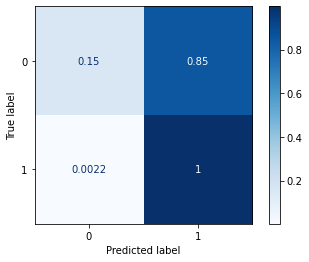

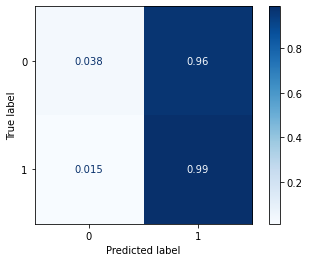

In [649]:
plot_confusion_matrix(rf_best_1, X_train, y_train, cmap=plt.cm.Blues, normalize='true')
plot_confusion_matrix(rf_best_1, X_validate, y_validate, cmap=plt.cm.Blues, normalize='true')

**Observation** Both Models is predicting alot of False Positives (FP) in both training and validation datasets

**[4.7]** Task: Calculate AUROC

In [650]:
from sklearn.metrics import roc_auc_score

In [651]:
rf_best_1_X_train_proba = rf_best_1.predict_proba(X_train)[:, 1]
rf_best_1_X_validate_proba = rf_best_1.predict_proba(X_validate)[:, 1]
print("rf_best_1_proba:", rf_best_1_X_train_proba)

rf_best_1_proba: [0.88705378 0.4699647  0.85968869 ... 0.83058625 0.69707417 0.92845285]


In [652]:
roc_auc_score(y_train, rf_best_1_X_train_proba)

0.9059804374513247

In [653]:
roc_auc_score(y_validate, rf_best_1_X_validate_proba)

0.6669719651452469

**Observations** 
* Training Dataset has a good AUROC prediction.
* Validation Dataset has a poor AUROC prediction. This indicates the model is over-fitting and not working well on unseen data
* The finaly Kaggle result AUROC 0.54153 continues this trend
* More work to be done

## 5. Random Forest - Feature Importance

**[5.1]** Task: Print feature importance

In [654]:
rf_best_1.feature_importances_

array([0.27053539, 0.09553735, 0.06340835, 0.03542695, 0.05606036,
       0.15555889, 0.05246931, 0.04643681, 0.06543929, 0.05796589,
       0.04375613, 0.05740528])

**[5.2]** Task: Create a Data Frame with feature importance values

In [655]:
feat_imp_rf_df = pd.DataFrame(
    {'feature': X_train.columns,
     'feature_importance': rf_best_1.feature_importances_
     }
     )

**[5.3]** Task: Sort dataframe and reset index

In [656]:
feat_imp_rf_df = feat_imp_rf_df.sort_values('feature_importance', ascending=False).reset_index(drop=True)

**[5.4]** Task: Display the first 10 rows of important features

In [657]:
feat_imp_rf_df.head(10)

,feature,feature_importance
0,GP,0.270535
1,FG%,0.155559
2,MIN,0.095537
3,REB,0.065439
4,PTS,0.063408
5,AST,0.057966
6,TOV,0.057405
7,FGA,0.056060
8,OREB,0.052469
9,DREB,0.046437


**[5.5]**  Task: Create graph of Feature Importance

In [658]:
import altair as alt

In [659]:
alt.Chart(feat_imp_rf_df).mark_bar().encode(
    x='feature_importance',
    y=alt.Y("feature", sort='-x'),
    tooltip=['feature','feature_importance'])

alt.Chart(...)

## 6. Random Forest - Kaggle Competition Preparation

**[6.1]** Prepare Kaggle Input File using rf_best Random Forest Model

In [660]:
# Drop Target and ID for X, and create target from y
df_test_id = df_test_cleaned['Id']
X_test = df_test_cleaned.drop(['Id'], axis=1)

**[6.2]** Check Test Dataset is ready for predicting

In [661]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GP      3799 non-null   float64
 1   MIN     3799 non-null   float64
 2   PTS     3799 non-null   float64
 3   FGM     3799 non-null   float64
 4   FGA     3799 non-null   float64
 5   FG%     3799 non-null   float64
 6   OREB    3799 non-null   float64
 7   DREB    3799 non-null   float64
 8   REB     3799 non-null   float64
 9   AST     3799 non-null   float64
 10  STL     3799 non-null   float64
 11  TOV     3799 non-null   float64
dtypes: float64(12)
memory usage: 356.3 KB


**[6.3]** Create y Prediction using the Test Dataset

In [662]:
y_predict = rf_best_1.predict(X_test)

In [663]:
print(y_predict)

[1 1 1 ... 1 1 1]


**[6.4]** Convert the Numpy Array into a Pandas Dataframe with a Column Name TARGET_5Yrs

In [664]:
# Convert numpy arrany y_predict values back to df_train_cleaned_scaled data frame 
y_predict = pd.DataFrame(np.squeeze(y_predict), columns=['TARGET_5Yrs']) 

**[6.5]** Concatenate Player ID and Prediction into on Data Frame and Sort by Id

In [665]:
y_predict = pd.concat([df_test_id, y_predict], axis=1)

In [666]:
y_predict = y_predict.sort_values(by=['Id'])

**[6.6]** Export Dataframe to CSV and save model

In [668]:
joblib.dump(rf_best_1, "../models/nfragar_20220212_random_forest_v1.joblib", compress=3)
y_predict.to_csv("../data/external/submission_nfragar_20220212_random_forest_v1.csv", index = False)
y_predict.shape

(3799, 2)